In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from copy import deepcopy as dcopy,copy
from skimage.morphology import label
from scipy.ndimage import measurements

In [2]:
# Working through the hooks puzzles.
# Back to my solution for hooks 3 with forced cells and then backtracking. 
# Determine the valid hook placements
# then loop through the rows and columns to determine forced cells 
# if these are mismatched on the row and column loop flag as inconsistent
# then solve the final grid with backtracking

url='https://www.janestreet.com/puzzles/hooks-7/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print(" ".join(x[7:11]))

The grid below can be partitioned into 9 L-shaped “hooks”. The largest is 9-by-9 (contains 17 squares), the next largest is 8-by-8 (contains 15 squares), and so on. The smallest hook is just a single square. Find where the hooks are located, and place nine 9’s in the largest hook, eight 8’s in the next-largest, etc., down to one 1 in the smallest hook. The filled squares must form a connected region. (Squares are “connected” if they are orthogonally adjacent.) Furthermore, every 2-by-2 region must contain at least one unfilled square. The sum of the values in each of the connected shaded regions must be the same. The answer to this puzzle is the product of the areas of the connected groups of empty squares in the completed grid.


### Puzzle details
<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2021/02/20210202_hooks_7.png" width="500" height="300">

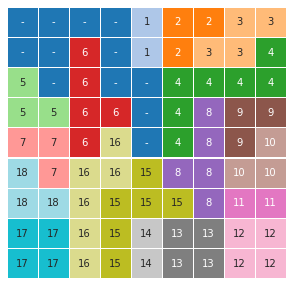

In [33]:
#Setup the constraints

groups = np.array([[0 ,0 ,0 ,0 ,1 ,2 ,2 ,3 ,3 ],
                   [0 ,0 ,6 ,0 ,1 ,2 ,3 ,3 ,4 ],
                   [5 ,0 ,6 ,0 ,0 ,4 ,4 ,4 ,4 ],
                   [5 ,5 ,6 ,6 ,0 ,4 ,8 ,9 ,9 ],
                   [7 ,7 ,6 ,16,0 ,4 ,8 ,9 ,10],
                   [18,7 ,16,16,15,8 ,8 ,10,10],
                   [18,18,16,15,15,15,8 ,11,11],
                   [17,17,16,15,14,13,13,12,12],
                   [17,17,16,15,14,13,13,12,12]                   
                 ])

fixed = np.array([[0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,4,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,5,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0]
                 ])

def grid_print(groups,numbers):
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    x = np.array((numbers).astype('int').astype('str'))
    x[x=="0"] ="-"
    ax = sns.heatmap(groups,annot=x,cbar=False,cmap="tab20",fmt="",linewidths=0.25)
    ax.axis("off")
    
grid_print(groups,groups) 

In [30]:
url='https://www.janestreet.com/puzzles/solutions/february-2021-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print(" ".join(x[7:9]))

### Puzzle solution
<img src="" width="300" height="400">

In [31]:
x =0
for i in range(1,10):
    x += i**2
print(x/19)

15.0
